# Student Performance

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data

mat = pd.read_csv('data\student-mat.csv', sep = ';')
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
mat.shape

(395, 33)

The dataset contains 395 rows and 33 columns

In [7]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [26]:
mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values.

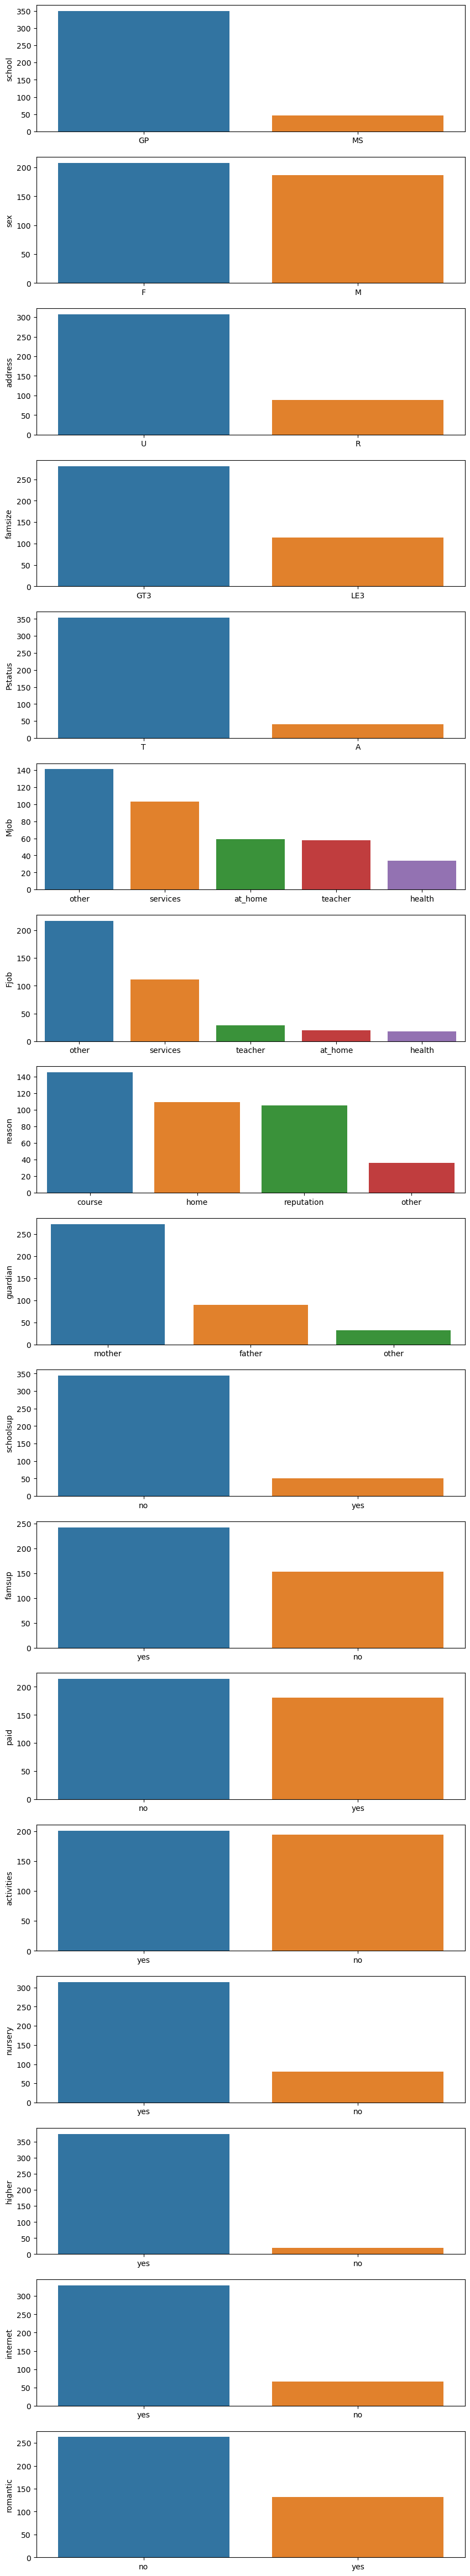

In [9]:
# distribution of categorical features
cat_attributes = mat.select_dtypes(object).columns.to_list()
x = 0
fig, ax = plt.subplots(17, figsize=(10,60))
for attribute in cat_attributes:
    sns.barplot(mat, x = mat[attribute].value_counts().index, y = mat[attribute].value_counts(), ax = ax[x])
    x+=1
plt.show()

Majority of students attend Gabriel Pereira and live in urban areas.They have a family size greater than 3 where both parents live together. Most parents are employed in the 'other' category and majority of students receive extra educational support.

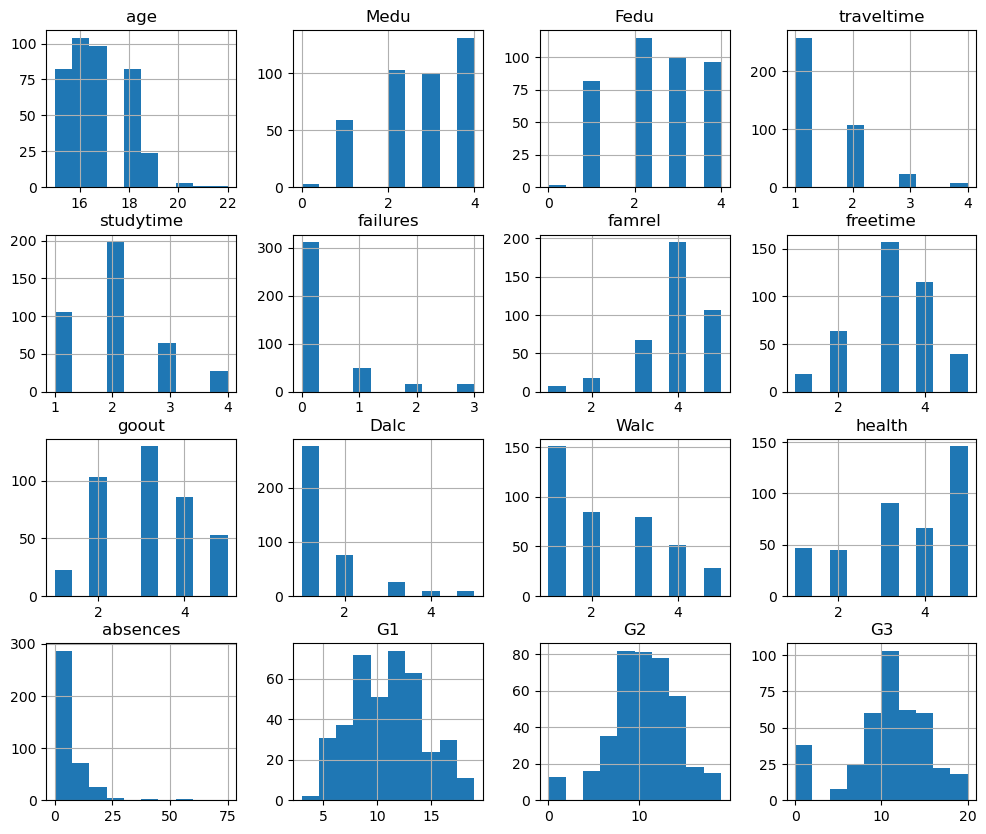

In [10]:
# distribution of numerical features
mat.hist(figsize =(12,10));

Most of the students fall within the age range of 16 to 19 and were never absent from school.

## Explore the Data

In [21]:
# score by school 

mat[['school', 'G3']].groupby('school', as_index=False).mean()

,school,G3
0,GP,10.489971
1,MS,9.847826


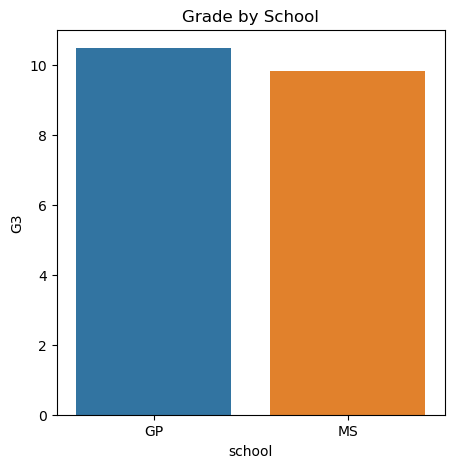

In [27]:
plt.figure(figsize=(5,5))

sns.barplot(x = 'school', y = 'G3', errorbar=None, data = mat)
plt.title('Grade by School');

Students in Gabriel Pereira score slightly better than students in Mousinho da Silveira on averge.

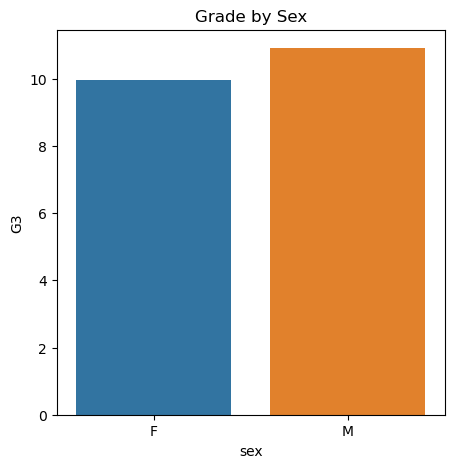

In [29]:
plt.figure(figsize=(5,5))

sns.barplot(x = 'sex', y = 'G3', errorbar=None, data = mat)
plt.title('Grade by Sex');

Male students perform slightly better at maths than female students.

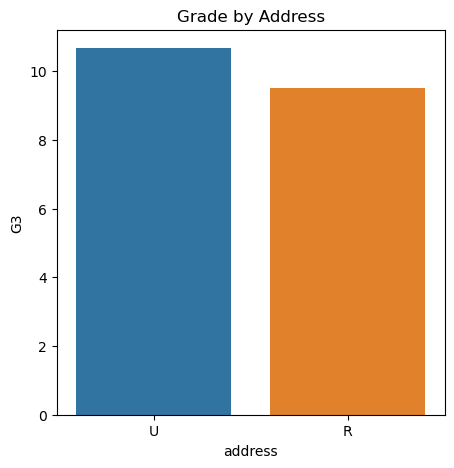

In [30]:
plt.figure(figsize=(5,5))

sns.barplot(x = 'address', y = 'G3', errorbar=None, data = mat)
plt.title('Grade by Address');

Urban students seem to do perform slightlybetter at maths than rural students

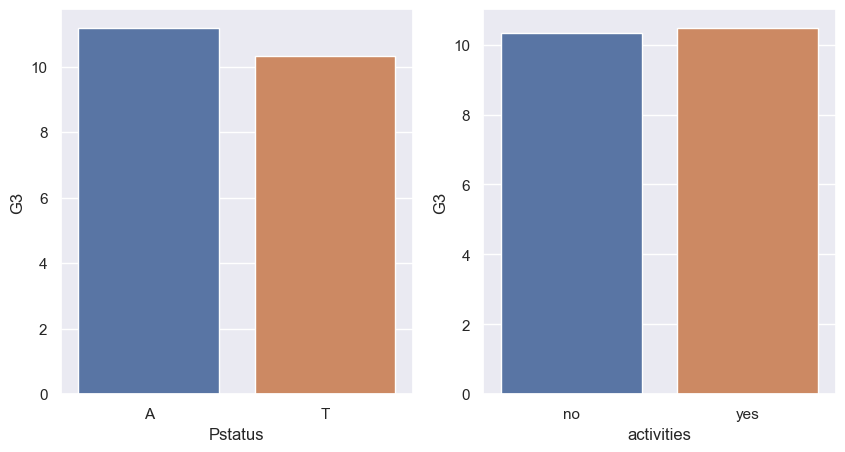

In [41]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.set()
sns.barplot(x = 'Pstatus', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'activities', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

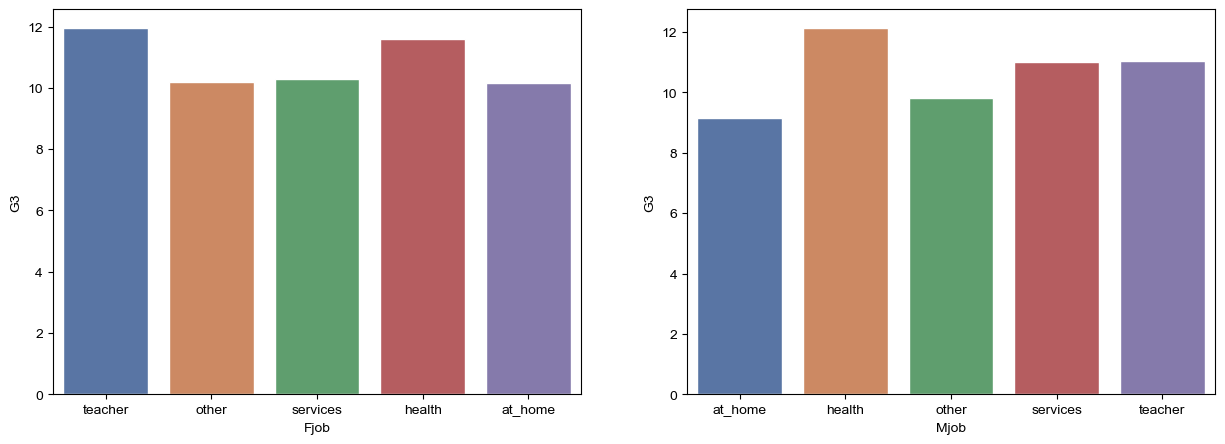

In [38]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'Fjob', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'Mjob', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

Students whose fathers work as teachers and mothers work in the health sector seem to perform better at maths

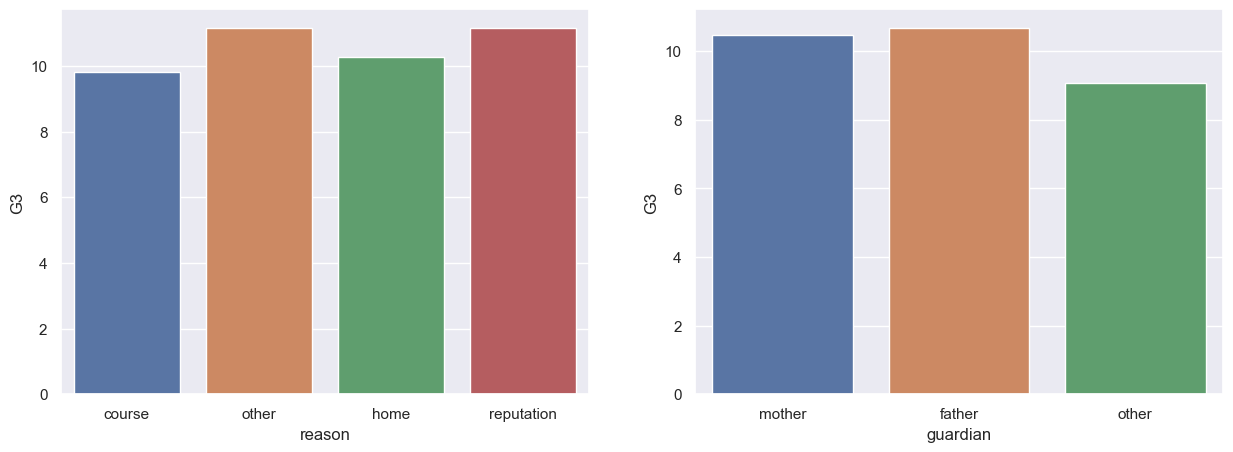

In [39]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'reason', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'guardian', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

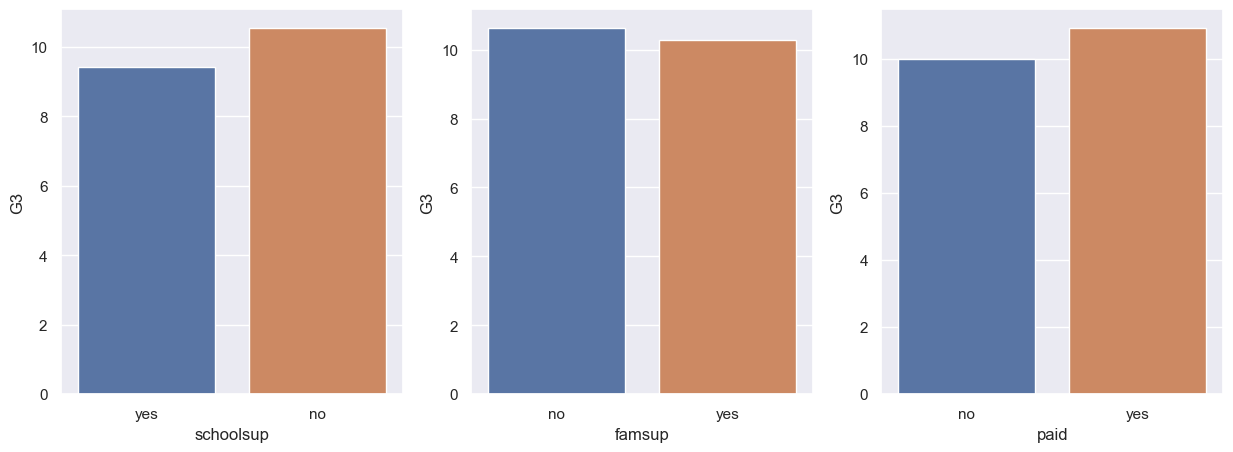

In [40]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.set()
sns.barplot(x = 'schoolsup', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'famsup', y = 'G3', errorbar=None, data = mat, ax = ax[1])
sns.barplot(x = 'paid', y = 'G3', errorbar=None, data = mat, ax = ax[2]);

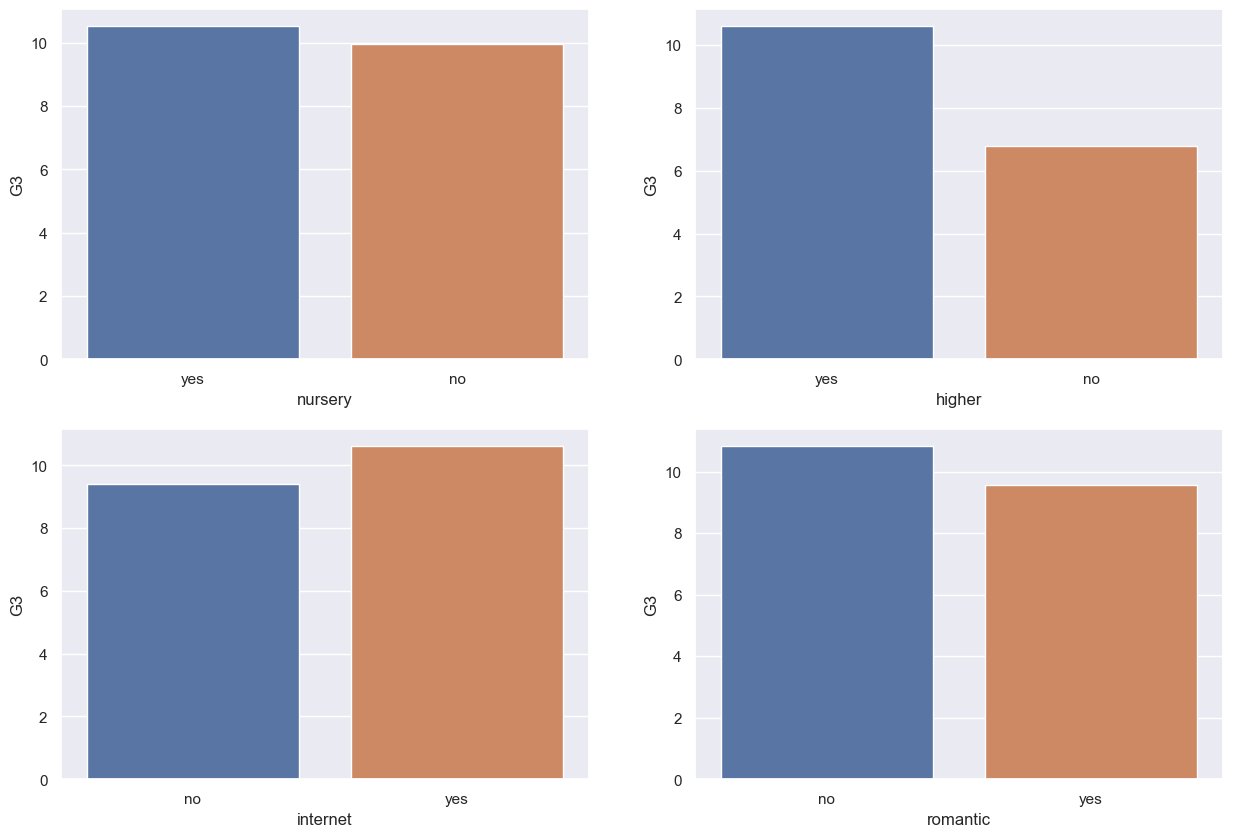

In [43]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

sns.set()
sns.barplot(x = 'nursery', y = 'G3', errorbar=None, data = mat, ax = ax[0][0])
sns.barplot(x = 'higher', y = 'G3', errorbar=None, data = mat, ax = ax[0][1])
sns.barplot(x = 'internet', y = 'G3', errorbar=None, data = mat, ax = ax[1][0])
sns.barplot(x = 'romantic', y = 'G3', errorbar=None, data = mat, ax = ax[1][1]);

Students who intend to continue their education at the higher level significantly perform better at maths than their peers who do not wish to further their education.

In [44]:
# look for correlation

corr_matrix = abs(mat.corr(numeric_only = True))
corr_matrix['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

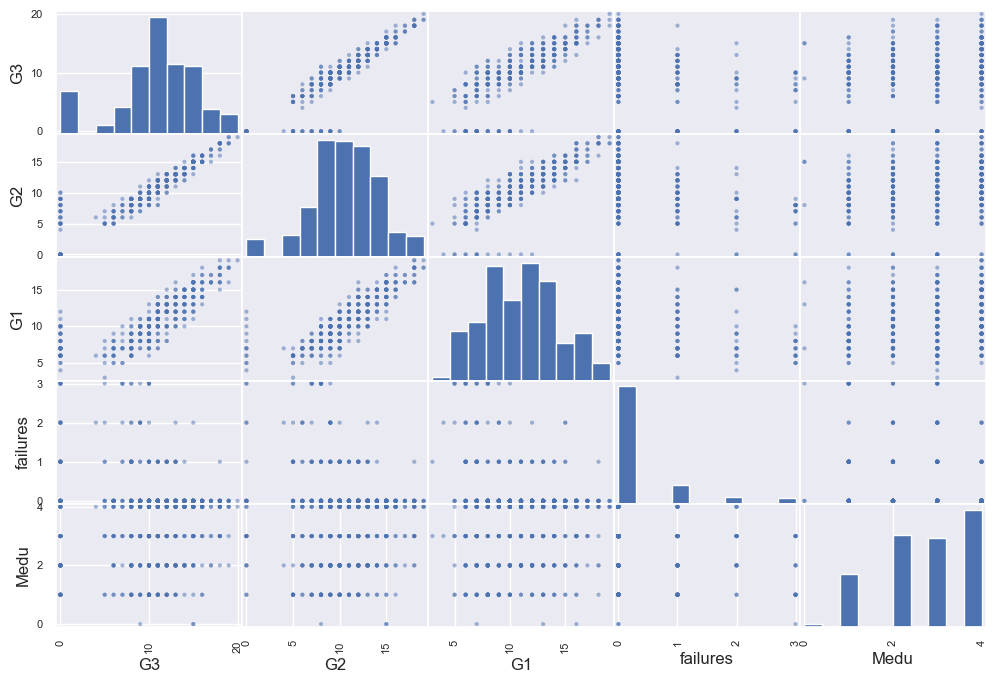

In [45]:
attributes = ['G3', 'G2', 'G1', 'failures', 'Medu']
scatter_matrix(mat[attributes], figsize = (12,8))
plt.show();

The 1st period, 2nd period and 3rd final grades are all have a strong positive correlation with each other. Students who perform well in any of these evaluations are likely to perform well in the others as well.

In [ ]:
# take a closer look at G1 and G2 scatterplots

fig, axes = plt.subplots(1,2, figsize = (15,5))

maths.plot(kind='scatter',x = 'G1', y ='G3', alpha = 0.3, grid = True, ax = axes[0])
maths.plot(kind='scatter',x = 'G2', y ='G3', alpha = 0.3, grid = True, ax = axes[1])
plt.show();

In [ ]:
sns.scatterplot(maths['G1']);

In [ ]:
sns.scatterplot(maths_df['G2']);

## Prepare data for ML Algorithm

# Split the data

In [11]:
# split the data into train and test sets

train, test = train_test_split( mat, test_size=0.2, shuffle = True, random_state=42)

In [ ]:
# shuffle the data, we need to reset the index

# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

# train.shape, test.shape

In [12]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [13]:
train.shape, test.shape

((316, 33), (79, 33))

## Clean the Data

In [ ]:
math = train.drop('G3', axis = 1)
math_labels = train.G3.copy()

In [ ]:
math.isnull().sum()

In [ ]:
# change column names to lower case

# math.columns = math.columns.str.lower()
# math.columns

In [ ]:
cat_attributes = math.select_dtypes('object').columns
cat_attributes

In [ ]:
# cat_attributes_1h = ['guardian', 'reason', 'Fjob', 'Mjob']
# cat_attributes_1h

In [ ]:
# encode categorical variables

# cat_attributes_le = [attr for attr in cat_attributes if attr not in cat_attributes_1h]
# cat_attributes_le

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# for attr in cat_attributes_le:
#     math[attr] = encoder.fit_transform(math[attr])

# math[cat_attributes_le].head()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# # create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')
# for attr in cat_attributes_1h:
#     encoder_df = pd.DataFrame(encoder.fit_transform(math[[attr]]).toarray())
#     encoder_df.columns = [f'{attr}_{col}' for col in encoder_df.columns]
#     math = math.join(encoder_df)

In [ ]:
math.info()

In [ ]:
# math.drop(cat_attributes_1h, axis = 1, inplace = True)
# math.head()

In [ ]:
num_attr_scale = ['age', 'absences', 'G1', 'G2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for attr in num_attr_scale:
#     x_train[attr] = scaler.fit_transform(x_train[[attr]])

# x_train[num_attr_scale].head()

# num_attr_scale = ['age', 'absences', 'G1', 'G2']

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# for attr in num_attr_scale:
#     math[attr] = scaler.fit_transform(math[[attr]])

# math[num_attr_scale].head()

In [ ]:
math_labels = scaler.fit_transform(math_labels.to_frame())
math_labels

## Building Transformation Pipelines

In [ ]:
import sklearn
sklearn.set_config(display = 'diagram')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

In [ ]:
cat_attributes_imp = [attr for attr in maths_df.columns if attr  not in num_attr_scale][:-1]

In [ ]:
print(f'Categorical features for One-hot encoding: {len(cat_attributes)}\n Numerical features for scaling: {len(num_attr_scale)}\n Categorical features for Simple Imputer: {len(cat_attributes_imp)}')

In [ ]:
print(f'{cat_attributes_imp}, {cat_attributes}, {num_attr_scale}')

In [ ]:
cat_im_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
cat_1h_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
# cat_le_pipeline = make_pipeline(LabelEncoder())

In [ ]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer((num_pipeline, num_attr_scale),
                                        (cat_im_pipeline, cat_attributes_imp),
                                        (cat_1h_pipeline, cat_attributes)
                                        )

In [ ]:
x_to_prep = maths_df.iloc[:, :-1]
x_to_prep.info()

In [ ]:
math_prepared = preprocessing.fit_transform(x_to_prep)

In [ ]:
math_prepared

## Feature Selection

In [ ]:
x_train = train.drop('g3', axis = 1)
y_train = train.g3

y_test = test.drop('g3', axis = 1)
y_test = test.g3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train, y_train)

feature_importances = rf_model.feature_importances_

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# model.fit(trainx, trainy)

# # Get feature importance from the trained classifier
# feature_importances = model.feature_importances_

In [ ]:
por_df.describe()